In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("Student Depression Dataset.csv")

In [101]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

[]

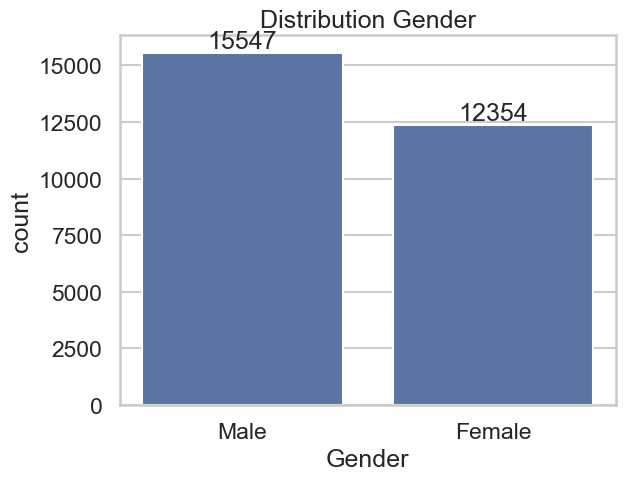

In [103]:
ax = sns.countplot(data = df , x = 'Gender')
plt.title("Distribution Gender")
ax.bar_label(ax.containers[0])
plt.plot()

In [104]:
gp = df.groupby("Profession").agg({'Depression' : 'mean'})
gp

,Depression
Profession,
Architect,0.875000
Chef,1.000000
Civil Engineer,1.000000
Content Writer,1.000000
Digital Marketer,0.666667
Doctor,1.000000
Educational Consultant,1.000000
Entrepreneur,1.000000
Lawyer,1.000000


Text(0.5, 1.0, 'Relation between Proffesion and Dipression')

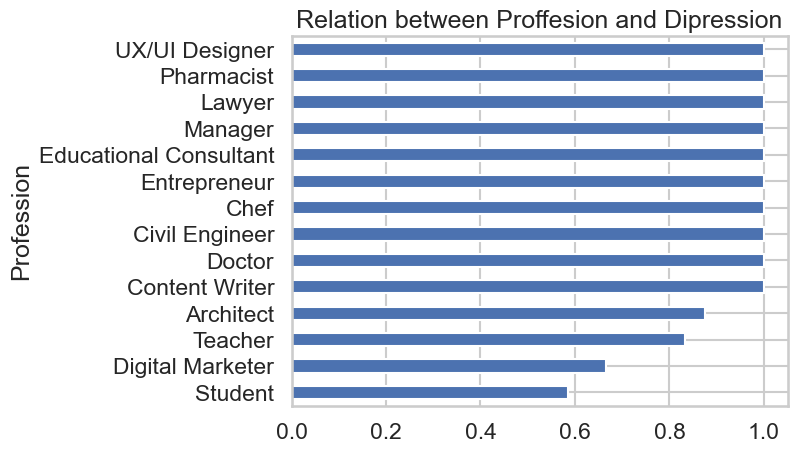

In [105]:
gp.sort_values('Depression').plot(kind='barh', legend=False)
plt.title("Relation between Proffesion and Dipression")


In [ ]:
#The chart indicates that depression levels are relatively lower among Architects, Digital Marketers, Students, and Teachers compared to other professions.

In [106]:
ga = df.groupby("Academic Pressure")['Depression'].count()
ga

Academic Pressure
0.0       9
1.0    4801
2.0    4178
3.0    7462
4.0    5155
5.0    6296
Name: Depression, dtype: int64

Text(0.5, 1.0, 'Relationship between Academic Pressure and Depression')

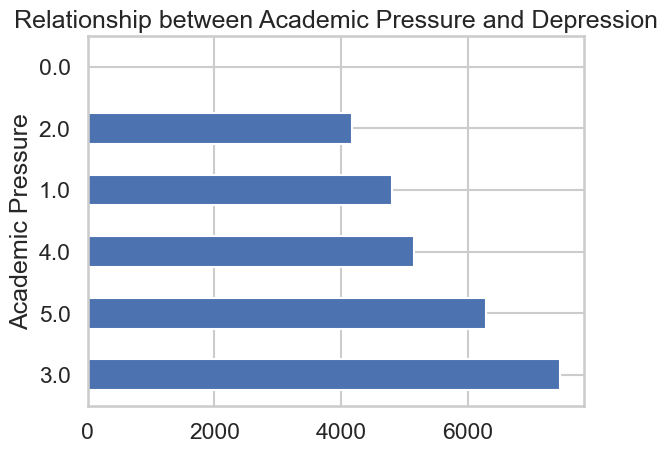

In [107]:
ga.sort_values(ascending=False).plot(kind='barh', legend=False)
plt.title("Relationship between Academic Pressure and Depression")


In [ ]:
# The above chart indicates levels 3–5 have noticeably more depression cases than levels 1–2.

In [108]:
gd = df.groupby("Age")['Depression'].count()
gd

Age
18.0    1587
19.0    1560
20.0    2237
21.0    1726
22.0    1160
23.0    1645
24.0    2258
25.0    1784
26.0    1155
27.0    1462
28.0    2133
29.0    1950
30.0    1145
31.0    1427
32.0    1262
33.0    1893
34.0    1468
35.0      10
36.0       7
37.0       2
38.0       8
39.0       3
41.0       1
42.0       4
43.0       2
44.0       1
46.0       2
48.0       3
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: Depression, dtype: int64

Text(0.5, 1.0, 'Relationship between Age and Depression')

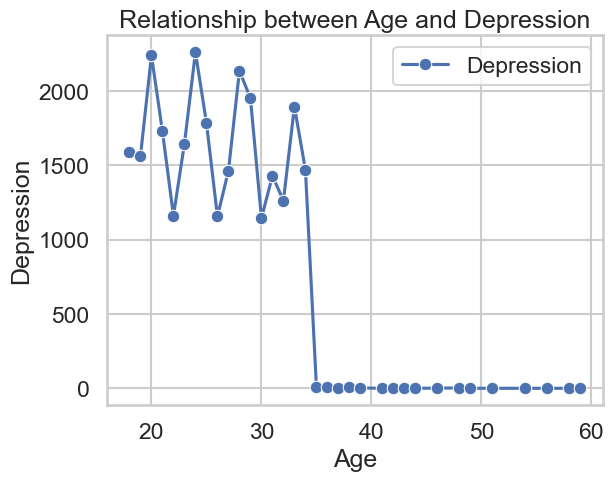

In [109]:
sns.lineplot(gd , marker = 'o' , label = 'Depression')
plt.title('Relationship between Age and Depression')

In [ ]:
#Depression is high at younger ages and becomes very low after about age 35.

In [116]:
df.groupby('Depression')['CGPA'].mean()

Depression
0    7.617282
1    7.683588
Name: CGPA, dtype: float64

In [ ]:
# Relation Between CGPA and Depression

In [122]:
gs = pd.crosstab(df['Study Satisfaction'] , df['Depression'])
gs

Depression,0,1
Study Satisfaction,,
0.0,4,6
1.0,1594,3857
2.0,2070,3768
3.0,2468,3353
4.0,3095,3264
5.0,2334,2088


Text(0.5, 1.0, 'Counts by Study Satisfaction and Depression')

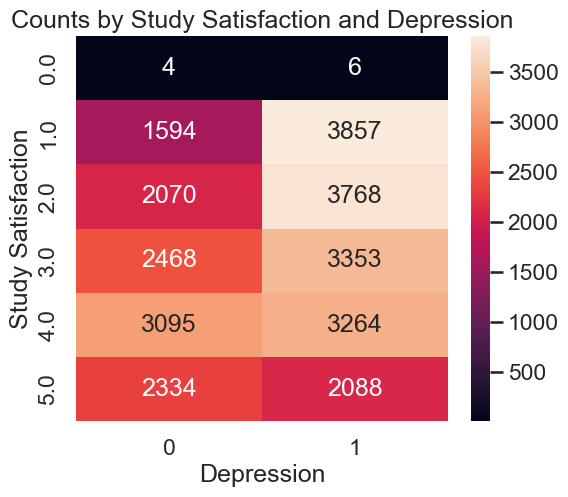

In [128]:
plt.figure(figsize = (6,5))
sns.heatmap(gs , annot = True , fmt='d')
plt.title('Counts by Study Satisfaction and Depression')


In [129]:
# When satisfaction is low to medium, more students are depressed. At the highest satisfaction (5), more students are not depressed.

In [130]:
gf = pd.crosstab(df['Sleep Duration'] , df['Depression'])
gf

Depression,0,1
Sleep Duration,,
5-6 hours,2666,3517
7-8 hours,2975,4371
Less than 5 hours,2949,5361
More than 8 hours,2966,3078
Others,9,9


Text(0.5, 1.0, 'Counts by Sleep Duration and Depression')

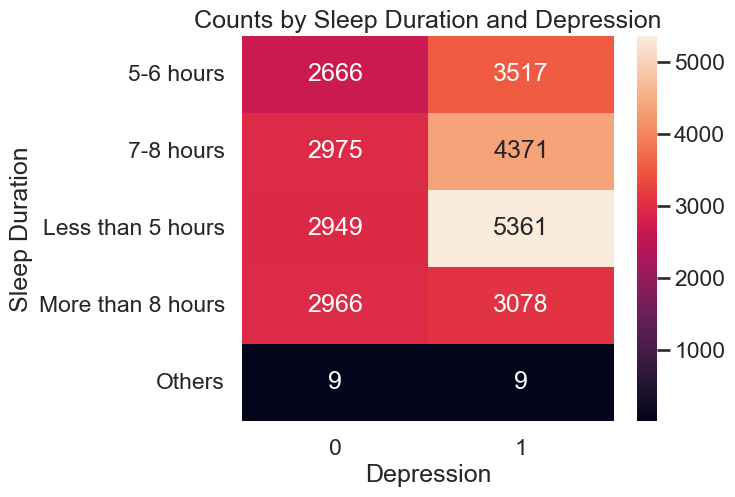

In [131]:
plt.figure(figsize = (6,5))
sns.heatmap(gf , annot = True , fmt='d')
plt.title('Counts by Sleep Duration and Depression')


In [132]:
#People who sleep 8+ hours are less likely to be depressed. Those who sleep under 5 hours are more likely to be depressed.

In [134]:
gw = pd.crosstab(df['Work/Study Hours'] , df['Depression'])

Text(0.5, 1.0, 'Counts by Work/Study Hours and Depression')

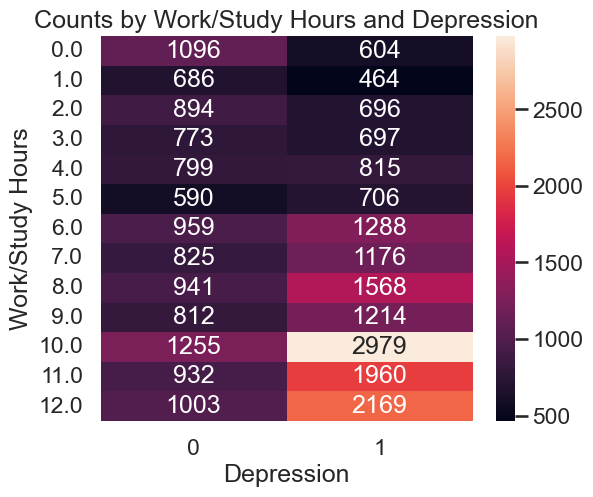

In [135]:
plt.figure(figsize = (6,5))
sns.heatmap(gw , annot = True , fmt='d')
plt.title('Counts by Work/Study Hours and Depression')

In [ ]:
#The chart shows that depression increases as work or study hours increase, with the highest depression seen at long hours.

In [138]:
gk = pd.crosstab(df['Financial Stress'] , df['Depression'])

Text(0.5, 1.0, 'Counts by Financial Stress and Depression')

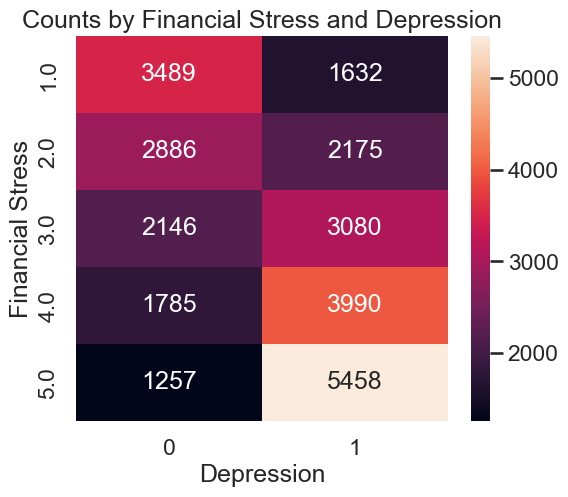

In [139]:
plt.figure(figsize = (6,5))
sns.heatmap(gk , annot = True , fmt='d')
plt.title('Counts by Financial Stress and Depression')

In [ ]:
# Higher financial stress is linked to more depression.

In [142]:
gm = pd.crosstab(df['Family History of Mental Illness'] , df['Depression'])

<Axes: xlabel='Depression', ylabel='Family History of Mental Illness'>

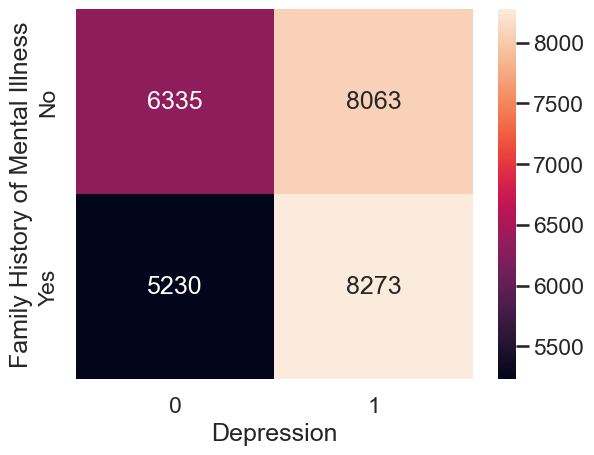

In [143]:
sns.heatmap(gm , annot = True , fmt='d')

In [ ]:
#People with a family history of mental illness are more likely to have depression.

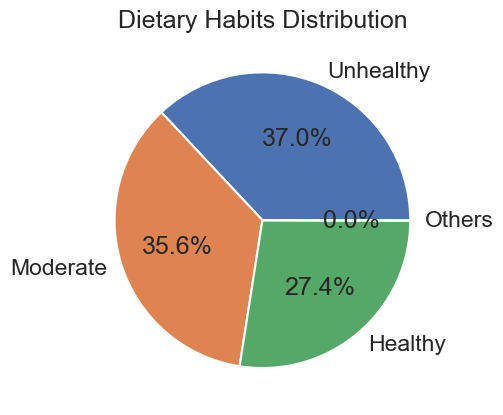

In [144]:
df['Dietary Habits'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Dietary Habits Distribution")
plt.ylabel("")
plt.show()

In [145]:
# Dietary Habit Distribution

In [150]:
pd.crosstab(df['Dietary Habits'], df['Depression'])


Depression,0,1
Dietary Habits,,
Healthy,4178,3473
Moderate,4363,5558
Others,4,8
Unhealthy,3020,7297


In [151]:
#People with unhealthy dietary habits have more depression, while those with a healthy diet have fewer depression cases.

<Axes: ylabel='Have you ever had suicidal thoughts ?'>

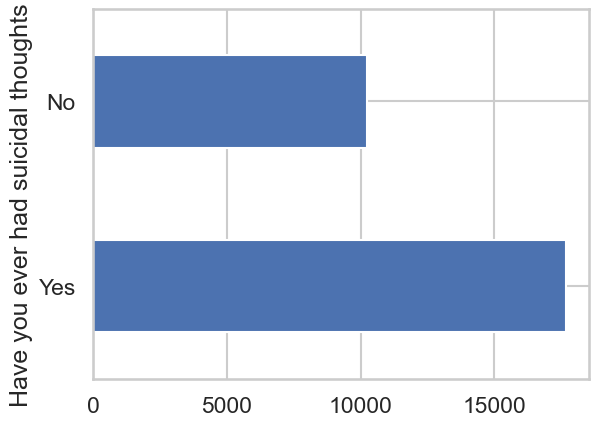

In [157]:
df['Have you ever had suicidal thoughts ?'].value_counts().plot( kind = 'barh' )

In [ ]:
# A higher number of people have suicidal thoughts.

In [163]:
gp = pd.crosstab(df['Have you ever had suicidal thoughts ?'] , df['Depression'])

<Axes: xlabel='Depression', ylabel='Have you ever had suicidal thoughts ?'>

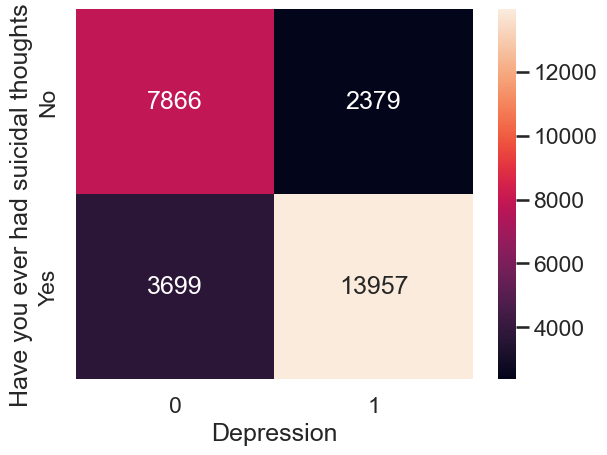

In [164]:

sns.heatmap(gp , fmt = 'd' ,  annot = True)

In [ ]:
#According to the above chart, more number of depressed people do not have suicidal thoughts.